## Removal of Stop words 

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhishek.mazumdar\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
# download the stopwords for english literature
stop_words = stopwords.words('english')
print(stop_words[:15])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']


In [7]:
# We have a normal open text here which contains stop words
text = "ChatGPT Chat Generative Pre-trained Transformer is a chatbot developed by OpenAI and launched in November 2022. It is built on top of OpenAI's GPT-3 family of large language models and has been fine-tuned an approach to transfer learning using both supervised and reinforcement learning techniques."

In [8]:
# remove stop words from text

stop_words = set(stop_words) # to speed up the parsing of words
text_to_tokens = text.lower().split()
print(text_to_tokens)

['chatgpt', 'chat', 'generative', 'pre-trained', 'transformer', 'is', 'a', 'chatbot', 'developed', 'by', 'openai', 'and', 'launched', 'in', 'november', '2022.', 'it', 'is', 'built', 'on', 'top', 'of', "openai's", 'gpt-3', 'family', 'of', 'large', 'language', 'models', 'and', 'has', 'been', 'fine-tuned', 'an', 'approach', 'to', 'transfer', 'learning', 'using', 'both', 'supervised', 'and', 'reinforcement', 'learning', 'techniques.']


In [9]:
def removeStopWords(tokens: list, stop_words: set)-> list:
    """Removes stop words from input list of strings
 
    Args:
        tokens (list): list of word toekns 
        stop_words (set): set of all stopwords

    Returns:
        list: list of tokens without stop words
    """
    clean_tokens = [word for word in tokens if word not in stop_words]
    return clean_tokens

In [10]:
# calling the stop words removal function
clean_tokens = removeStopWords(tokens= text_to_tokens, stop_words= stop_words)
print(clean_tokens)

['chatgpt', 'chat', 'generative', 'pre-trained', 'transformer', 'chatbot', 'developed', 'openai', 'launched', 'november', '2022.', 'built', 'top', "openai's", 'gpt-3', 'family', 'large', 'language', 'models', 'fine-tuned', 'approach', 'transfer', 'learning', 'using', 'supervised', 'reinforcement', 'learning', 'techniques.']


In [11]:
# comparing the length of list with and without stop words 
print(f"Number of words in original text--> {len(text_to_tokens)}\n\n Number of words in clean text---> {len(clean_tokens)}")

Number of words in original text--> 45

 Number of words in clean text---> 28


## Stemming of words 
- stemming ususally refers to the reduction of different forms of words into ito its base form. This will be more clear by observing an  example

In [13]:
# Importting two types of stemming module we have from nltk
from nltk.stem import PorterStemmer, LancasterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [14]:
text = " Happier happening listening listen amazing amazed maximum cars"
word_tokens = [word for word in text.lower().split()]
stemmed_porter = [porter.stem(word) for word in word_tokens]
stemmed_lancaster = [lancaster.stem(word) for word in word_tokens] 

In [16]:
print("Original Tokens: \n", word_tokens)
print("\nPorter Results: \n", stemmed_porter)
print("\nLancaster Results: \n", stemmed_lancaster)

Original Tokens: 
 ['happier', 'happening', 'listening', 'listen', 'amazing', 'amazed', 'maximum', 'cars']

Porter Results: 
 ['happier', 'happen', 'listen', 'listen', 'amaz', 'amaz', 'maximum', 'car']

Lancaster Results: 
 ['happy', 'hap', 'list', 'list', 'amaz', 'amaz', 'maxim', 'car']


#### Note:
- Porter stemmer is a light-weight and simpler version of stemming where it has less number of rules and hence are often computationally efficient and less costly
- However, Lancaster is a form of stemming which has more complex rules for stemming and are often computationally expensive. But, depending upon the usecase this can be benificial  

## Lemmatization 

The fundamental difference betweeen stemming and lemmatization is, in case of stemming the base words are often meaningless. This may be benifical from the model objective point of view. With lemmatization, the base words retain the meaning of original word. This can be crucial where a model outputs words as a part of NLP process. There, we dont want meaning-less words to apprear as an output. 

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhishek.mazumdar\AppData\Roaming\nltk_data..
[nltk_data]     .


True

In [19]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem_tokens = [lem.lemmatize(word) for word in word_tokens]
print("Original Tokens: \n", word_tokens)
print("\nLemmatized tokens:\n ", lem_tokens)

Original Tokens: 
 ['happier', 'happening', 'listening', 'listen', 'amazing', 'amazed', 'maximum', 'cars']

Lemmatized tokens:
  ['happier', 'happening', 'listening', 'listen', 'amazing', 'amazed', 'maximum', 'car']


In [20]:
# Not much change is observed with respect to the lemmatized words. Lemmatization often requires a particular
# parts of speech criteria to treat a word for lemmatization accordingly. 
from nltk.corpus import wordnet
lem_tokens = [lem.lemmatize(word, wordnet.VERB) for word in word_tokens]
print("Original Tokens: \n", word_tokens)
print("\nLemmatized tokens:\n ", lem_tokens)

Original Tokens: 
 ['happier', 'happening', 'listening', 'listen', 'amazing', 'amazed', 'maximum', 'cars']

Lemmatized tokens:
  ['happier', 'happen', 'listen', 'listen', 'amaze', 'amaze', 'maximum', 'cars']


#### Note:
- with appropriate parts of speech, the words are lemmatized in their respective ways. We can observe the differences here. 

## Canocial and Comartibility equivalence
- Often times we may come accross unicode characters because the letter have essentially written using a different language. This is known as canonical issues. Example - Ç "\u00C7" is different from Ç "\u0043\u0327" even though the look the same 
- There can be cases where the simple words are written in a more fancier way and our model may not find the them same as their regular versions. Example - 🅘🅝🅓🅘🅥🅘🅓🅤🅐🅛🅘🅣🅨 is same as individuality but the model will recognize them as two different words

Due to these reasons, unicode normalization has to be done to avoid the above two issues

Compartibility Equivalnece

| | | Equivalence Reason |
| --- | --- | --- |
| ℌ | H | Font variant |
| \[NBSP\] | \[SPACE\] | Both are linebreak sequences |
| ① | 1 | Circled variant |
| x² | x2 | Superscript |
| xⱼ | xj | Subscript |
| ½ | 1/2 | Fractions |

Canonical equivalence

| | | Equivalence Reason |
| --- | --- | --- |
| Ç | C◌̧ | Combined character sequences |
| 가 | ᄀ ᅡ | Conjoined Korean characters |


visit [the blog](https://towardsdatascience.com/what-on-earth-is-unicode-normalization-56c005c55ad0) for better understanding 

### Composition and De-composition 
there are two ways that can be followed to normalize such uncode situations.
- one way is to decompose a unicode into its constituent forms 
- second is to decompose and compose them back to standrd unicode form

Following is the list of was we can normalize

| Name | Abbreviation | Description | Example |
| --- | --- | --- | --- |
| Form D | NFD | *Canonical* decomposition | `Ç` → `C ̧` |
| Form C | NFC | *Canoncial* decomposition followed by *canonical* composition | `Ç` → `C ̧` → `Ç` |
| Form KD | NFKD | *Compatibility* decomposition | `ℌ ̧` → `H ̧` |
| Form KC | NFKC | *Compatibility* decomposition followed by *canonical* composition | `ℌ ̧` → `H ̧` → `Ḩ` |

In [21]:
# Form D or NFD 
import unicodedata

In [22]:
c_with_cedilla = "\u00C7"
c_plus_cedilla = "\u0043\u0327"

print(f"c_with_cedilla: {c_with_cedilla} & c_plus_cedilla: {c_plus_cedilla}")

c_with_cedilla: Ç & c_plus_cedilla: Ç


They Both look identical but their representation is completely different. Hence, computer shall record them as two different letters 

In [25]:
# normalize by decomposition 

print("Before Normalization: ",c_with_cedilla == c_plus_cedilla)
print("After Normalization: ", unicodedata.normalize('NFD', c_with_cedilla) == c_plus_cedilla)

# The unicode NFD normalization decomposed c_with_cedilla to c_plus_cedilla

Before Normalization:  False
After Normalization:  True


NFC of the other hand works a bit differently. It decomposes and then re-composes it back to a normal form

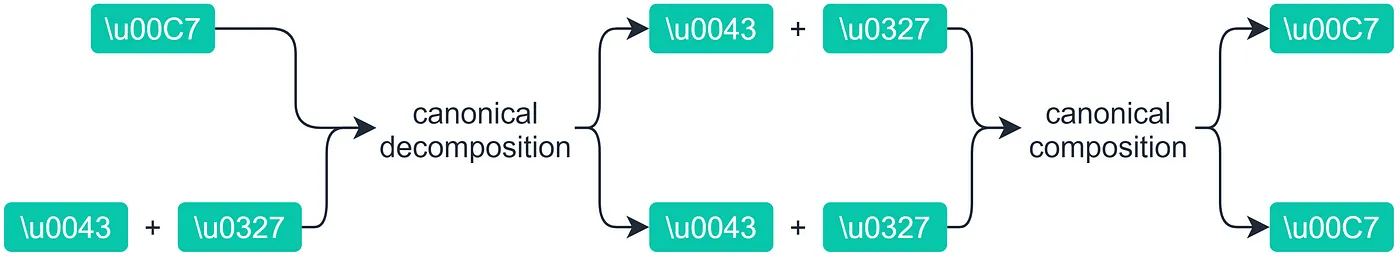

In [26]:
c_with_cedilla == unicodedata.normalize('NFC', c_plus_cedilla)

True

In [27]:
#  Shall not match
unicodedata.normalize('NFC', c_with_cedilla) == c_plus_cedilla

False

#### Normal form for Compatibility Equivalence -- Normal Form KD (NFKD)
- C - canonical & K - compatibility

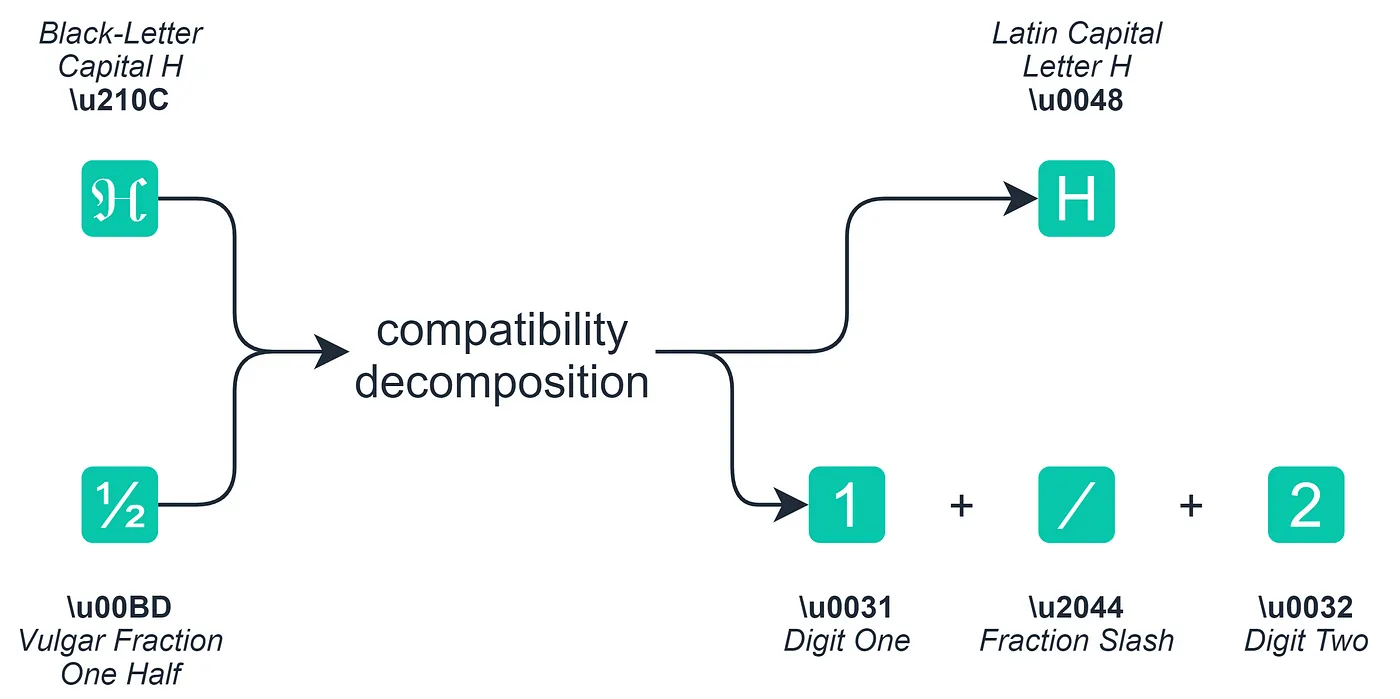

In [28]:
unicodedata.normalize('NFKD', 'ℌ')

'H'

#### Generalizatio  of unicode Normalization by using NFKC
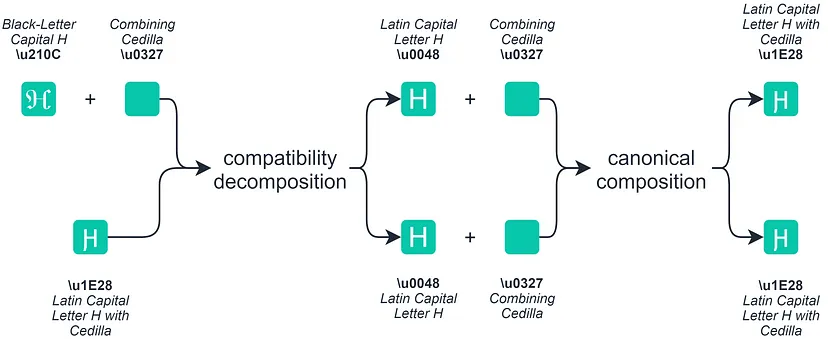

In [29]:
fancy_H_with_cedilla = "\u210B\u0327"
fancy_H_with_cedilla

'ℋ̧'

In [30]:
H_with_cedilla = "\u1e28"
H_with_cedilla

'Ḩ'

In [31]:
unicodedata.normalize('NFKC', fancy_H_with_cedilla) == H_with_cedilla

True

In [32]:
# If we do NFKD on this, then it will not work 
unicodedata.normalize('NFKD', fancy_H_with_cedilla) == H_with_cedilla

False

#### Note:
NFKC can be used as a generalized form of unicode normalization where it takes care of both compatibility and canonical conditions